# Bottleneck Analysis

Initial analysis shows potential bottlenecks between:
- Declaration final approved by Supervisor -> Request Payment (24,9 years)
- Request Payment -> Payment Handled (31,4 years)

In [1]:
import sys
sys.path.insert(1, '../')

from src.io import DOM_DEC, INT_DEC, PER, PRE, REQ, read_log, to_dataframe
from src.util import time_dif
from src.viz import distplot                 
from src.insights import *

In [2]:
dom_dec_log = read_log(DOM_DEC)

parsing log, completed traces :: 100%|██████████| 10357/10357 [00:04<00:00, 2086.77it/s]


## Declaration final approved by Supervisor -> Request Payment

1. select traces where both activities occour
2. calculate time between them

In [3]:
collector = []
for trace in dom_dec_log:
    approve_event = None
    request_event = None
    for event in trace:
        if event['concept:name'] == 'Declaration FINAL_APPROVED by SUPERVISOR':
            approve_event = event['time:timestamp']
        elif event['concept:name'] == 'Request Payment':
            request_event = event['time:timestamp']
            break
    if request_event is not None and approve_event is not None:
        collector.append((approve_event, request_event, trace.attributes['concept:name']))

In [4]:
print('Found %s pairs.' %len(collector))

Found 9912 pairs.


In [5]:
dt_hours = list(map(lambda x: time_dif(x, 'h'), collector))

Median duration:

In [6]:
dt_hours.sort()

In [7]:
median = dt_hours[len(dt_hours)//2]
print('The median duration is: %s hour(s)' %median)

The median duration is: 14 hour(s)


In [8]:
print('The maximum duration is: %s hour(s)' %max(dt_hours))

The maximum duration is: 1695 hour(s)


#### How many times this takes longer than 1 day?

In [9]:
absolut = len(list(filter(lambda x: x > 47, dt_hours)))
relative = (absolut/len(dt_hours))
print('abs.: %s, relative: %0.2f' %(absolut, relative))

abs.: 948, relative: 0.10


## Questions:

### How many declarations took more than 48h to be paided after approval?

In [10]:
total = len(dt_hours)
over = list(filter(lambda x: x > 48, dt_hours))
relative = (len(over)/total) * 100
print('%s declarations (~%.2f%s) took longer than 48h after approval.' %(len(over), relative, '%'))

927 declarations (~9.35%) took longer than 48h after approval.


#### What is the maximum?

In [11]:
print('The longes cycle-time look %s days.' %(max(over)//24))

The longes cycle-time look 70 days.


### What is the distribution about all declarations that take less then 48h?

Filter cases:

In [12]:
less_app_req = list(filter(lambda x: x <= 48, dt_hours))

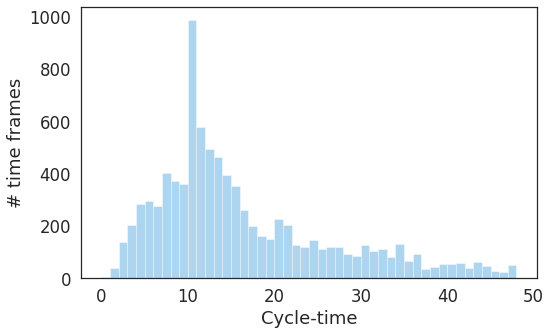

In [13]:
distplot(less_app_req, 48, 'Cycle-time', '# time frames', None, '04_BNA_approval_request_48_hours.pdf')

## Request Payment -> Payment Handled

In [14]:
collector = []
for trace in dom_dec_log:
    approve_event = None
    request_event = None
    for event in trace:
        if event['concept:name'] == 'Request Payment':
            approve_event = event['time:timestamp']
        elif event['concept:name'] == 'Payment Handled':
            request_event = event['time:timestamp']
            break
    if request_event is not None and approve_event is not None:
        collector.append((approve_event, request_event, trace.attributes['concept:name']))

In [15]:
print('Found %s pairs.' %len(collector))

Found 9911 pairs.


In [16]:
dt_hours = list(map(lambda x: time_dif(x, 'h'), collector))

## Questions:

### How many declarations took more than 48h to be paided after approval?

In [17]:
total = len(dt_hours)
over = list(filter(lambda x: x > 48, dt_hours))
relative = (len(over)/total) * 100
print('%s declarations (~%.2f%s) took longer than 72h after approval.' %(len(over), relative, '%'))

470 declarations (~4.74%) took longer than 72h after approval.


#### What is the maximum?

In [18]:
print('The longes cycle look %s days.' %(max(over)//24))

The longes cycle look 10 days.


### What is the distribution about all declarations that take less then 48h?

Filter cases:

In [19]:
less_req_handle = list(filter(lambda x: x <= 48, dt_hours))

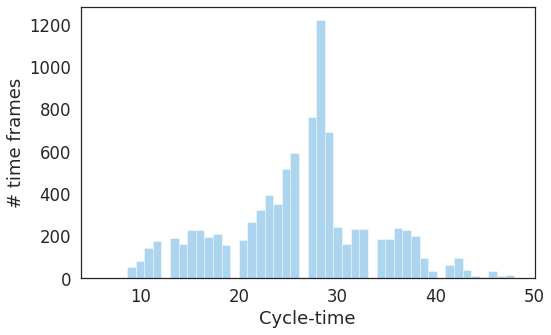

In [20]:
distplot(less_req_handle, 48, 'Cycle-time', '# time frames', None, '04_BNA_request_handle_hours.pdf')